In [42]:
#!pip install seaborn
#!pip install openpyxl


In [43]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [44]:
# Reading the Data
df = pd.read_csv('./data/CrimesPR.csv',encoding='latin-1',delimiter=';')

In [45]:
# visualizing the DataFrame
df.head(5)

,Ano,Localidade,Índice de Desenvolvimento Humano Municipal (IDHM),"Produto Interno Bruto (PIB) per Capita (R$ 1,00)",Crimes de Ameaça,Crimes de Estelionato,Crimes de Estupro,Crimes de Furto,Crimes de Lesão Corporal,Crimes de Roubo,Furtos de Veículos,Ocorrências Envolvendo Tráfico de Drogas,Ocorrências Envolvendo Uso/Consumo de Drogas,Perturbação do Sossego/Tranquilidade,Roubos de Veículos
0,2018,Estado do Paraná,NaN,38.773,110.917,29.856,6.691,172.033,64.417,60.096,17.678,11.869,16.172,28.994,7.885
1,2018,Abatiá,NaN,21.529,101.000,3,5,88.000,58.000,20,4,5,11,28,4
2,2018,Adrianópolis,NaN,43.677,43.000,13,9,31.000,32.000,2,2,1,3,3,-
3,2018,Agudos do Sul,NaN,22.088,105.000,12,5,100.000,52.000,19,5,5,4,8,6
4,2018,Almirante Tamandaré,NaN,13.168,1.151,174,68,1.129,660.000,639,176,44,81,157,44


In [46]:
# Dimensions of the DataFrame
# There are 2400 rows by 15 columns (Features)
df.shape

(2400, 15)

In [47]:
# get the columns printed
print(list(df.columns))

['Ano', 'Localidade', 'Índice de Desenvolvimento Humano Municipal (IDHM) ', 'Produto Interno Bruto (PIB) per Capita (R$ 1,00)', 'Crimes de Ameaça ', 'Crimes de Estelionato ', 'Crimes de Estupro ', 'Crimes de Furto ', 'Crimes de Lesão Corporal ', 'Crimes de Roubo ', 'Furtos de Veículos ', 'Ocorrências Envolvendo Tráfico de Drogas ', 'Ocorrências Envolvendo Uso/Consumo de Drogas ', 'Perturbação do Sossego/Tranquilidade ', 'Roubos de Veículos ']


In [48]:
# Years contained in the Dataset
print(df['Ano'].unique())

[2018 2019 2020 2021 2022 2023]


In [49]:
# Cities in the Dataset - all cities in the state of Parana.
print(df['Localidade'].unique())

['Estado do Paraná' 'Abatiá' 'Adrianópolis' 'Agudos do Sul'
 'Almirante Tamandaré' 'Altamira do Paraná' 'Alto Paraíso' 'Alto Paraná'
 'Alto Piquiri' 'Altônia' 'Alvorada do Sul' 'Amaporã' 'Ampére' 'Anahy'
 'Andirá' 'Ângulo' 'Antonina' 'Antônio Olinto' 'Apucarana' 'Arapongas'
 'Arapoti' 'Arapuã' 'Araruna' 'Araucária' 'Ariranha do Ivaí' 'Assaí'
 'Assis Chateaubriand' 'Astorga' 'Atalaia' 'Balsa Nova' 'Bandeirantes'
 'Barbosa Ferraz' 'Barra do Jacaré' 'Barracão' 'Bela Vista da Caroba'
 'Bela Vista do Paraíso' 'Bituruna' 'Boa Esperança'
 'Boa Esperança do Iguaçu' 'Boa Ventura de São Roque'
 'Boa Vista da Aparecida' 'Bocaiúva do Sul' 'Bom Jesus do Sul'
 'Bom Sucesso' 'Bom Sucesso do Sul' 'Borrazópolis' 'Braganey'
 'Brasilândia do Sul' 'Cafeara' 'Cafelândia' 'Cafezal do Sul' 'Califórnia'
 'Cambará' 'Cambé' 'Cambira' 'Campina da Lagoa' 'Campina do Simão'
 'Campina Grande do Sul' 'Campo Bonito' 'Campo do Tenente' 'Campo Largo'
 'Campo Magro' 'Campo Mourão' 'Cândido de Abreu' 'Candói' 'Cantagalo'

### All the cities within the State o Paraná are included and the total for all the cities is designated as "Estado do Paraná".

In [50]:
print('The total number of cities is: {0}'.format(df['Localidade'].nunique()-1))

The total number of cities is: 399


In [51]:
# Cleaning the Data!
# Replacing "-" by Null Values
df = df.replace("-",np.nan)

In [52]:
# converting all the columns, except "Localidade"to the float type because 
# some features were, originally, as "object" type.
for col in df.drop(columns=['Localidade']).columns:
    if col != "Ano":
        df[col] = df[col].astype(float)
    else:
        df[col] = df[col].astype(int)

In [53]:
# Visualizing the descriptive statistics of the DataFrame
# Null values are replaced by 0 in order to show the presence of Null Values
df.fillna(0.0).describe().T

,count,mean,std,min,25%,50%,75%,max
Ano,2400.0,2020.500000,1.708181,2018.000,2019.00,2020.500,2022.00000,2023.000
Índice de Desenvolvimento Humano Municipal (IDHM),2400.0,0.000000,0.000000,0.000,0.00,0.000,0.00000,0.000
"Produto Interno Bruto (PIB) per Capita (R$ 1,00)",2400.0,24.456106,22.651318,0.000,0.00,24.984,36.94975,170.126
Crimes de Ameaça,2400.0,130.539594,163.594639,1.007,36.75,70.000,153.00000,998.000
Crimes de Estelionato,2400.0,73.950786,133.307742,0.000,10.75,27.000,71.25000,993.000
Crimes de Estupro,2400.0,15.716963,45.286737,0.000,3.00,6.000,13.00000,875.000
Crimes de Furto,2400.0,126.569727,161.375352,1.004,32.00,67.000,147.00000,995.000
Crimes de Lesão Corporal,2400.0,96.893184,141.346011,1.000,24.00,48.000,104.00000,976.000
Crimes de Roubo,2400.0,34.948533,98.971991,0.000,2.00,7.000,23.00000,959.000
Furtos de Veículos,2400.0,23.773605,75.745700,0.000,2.00,5.000,14.00000,912.000


In [54]:
# removing "IDH" column, since it just contains null values
df = df.drop(columns=['Índice de Desenvolvimento Humano Municipal (IDHM) '])

In [55]:
# verifying duplicated data in the dataset
# there are not duplicated rows in the dataset
df.duplicated().sum()

0

In [56]:
# Porcentage of Null Values according to each Feature
100*df.isnull().sum()/df.shape[0]

Ano                                                  0.000000
Localidade                                           0.000000
Produto Interno Bruto (PIB) per Capita (R$ 1,00)    33.333333
Crimes de Ameaça                                     0.000000
Crimes de Estelionato                                0.458333
Crimes de Estupro                                    5.333333
Crimes de Furto                                      0.000000
Crimes de Lesão Corporal                             0.000000
Crimes de Roubo                                      7.166667
Furtos de Veículos                                   8.125000
Ocorrências Envolvendo Tráfico de Drogas            12.833333
Ocorrências Envolvendo Uso/Consumo de Drogas        11.125000
Perturbação do Sossego/Tranquilidade                 1.458333
Roubos de Veículos                                  29.166667
dtype: float64

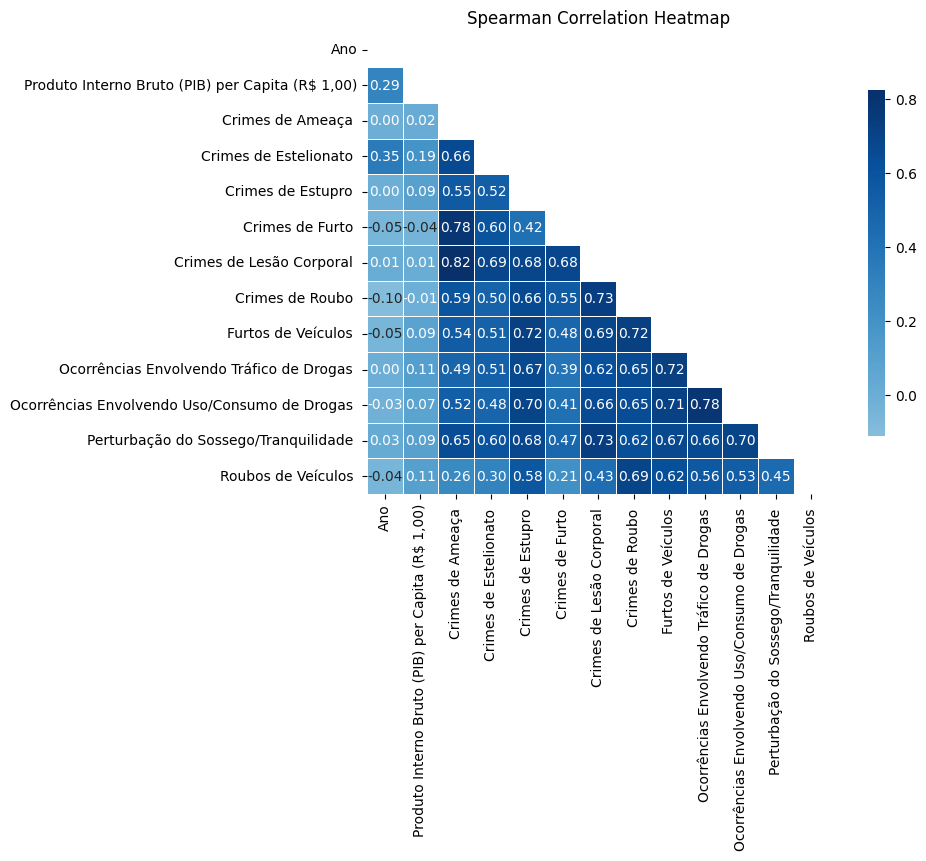

In [58]:
# Calculate the Spearman correlation matrix
spearman_corr = df.drop(columns=['Localidade']).corr(method='spearman')

# Create a mask for the upper triangle (optional, for better visualization)
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(spearman_corr, mask=mask, cmap='Blues', vmax=spearman_corr[mask][spearman_corr[mask]!=1].max().max(), vmin=-.11, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75}, annot=True, fmt=".2f")

# Set the title
plt.title('Spearman Correlation Heatmap')

# Display the plot
plt.show()

In [17]:
# Since columns "PIB" and "Roubos de Veículos" have a very large number
#  of null values, we decided to drop them
df = df.drop(columns=['Produto Interno Bruto (PIB) per Capita (R$ 1,00)','Roubos de Veículos '])

In [18]:
# Sorting the DataFrame by 'Localidade' and year ('Ano), since
# this Data has a chronological order.
df = df.sort_values(by=['Localidade','Ano'])

In [19]:
# Let us fill null values of each column with the median of each column
# grouped by Locality. The remaining null values after these transformations
# must be dropped, since no data was found in these rows.

list_cols = df.drop(columns=['Localidade']).columns
def g(df):
  return df.fillna(df.groupby(by=['Localidade'],as_index=False)[list_cols].transform('median'))

df = df.groupby(by=['Localidade'],as_index=False).apply(g)


In [20]:
# Verifying remaining Null Values
df.isna().sum()

Ano                                               0
Localidade                                        0
Crimes de Ameaça                                  0
Crimes de Estelionato                             0
Crimes de Estupro                                 0
Crimes de Furto                                   0
Crimes de Lesão Corporal                          0
Crimes de Roubo                                   0
Furtos de Veículos                                0
Ocorrências Envolvendo Tráfico de Drogas         30
Ocorrências Envolvendo Uso/Consumo de Drogas      0
Perturbação do Sossego/Tranquilidade              0
dtype: int64

In [21]:
# There are 30 remaining Null Values, which must be dropped.
df = df.dropna()

In [22]:
# let us see again the shape of the DataFrame
df.shape

(2370, 12)

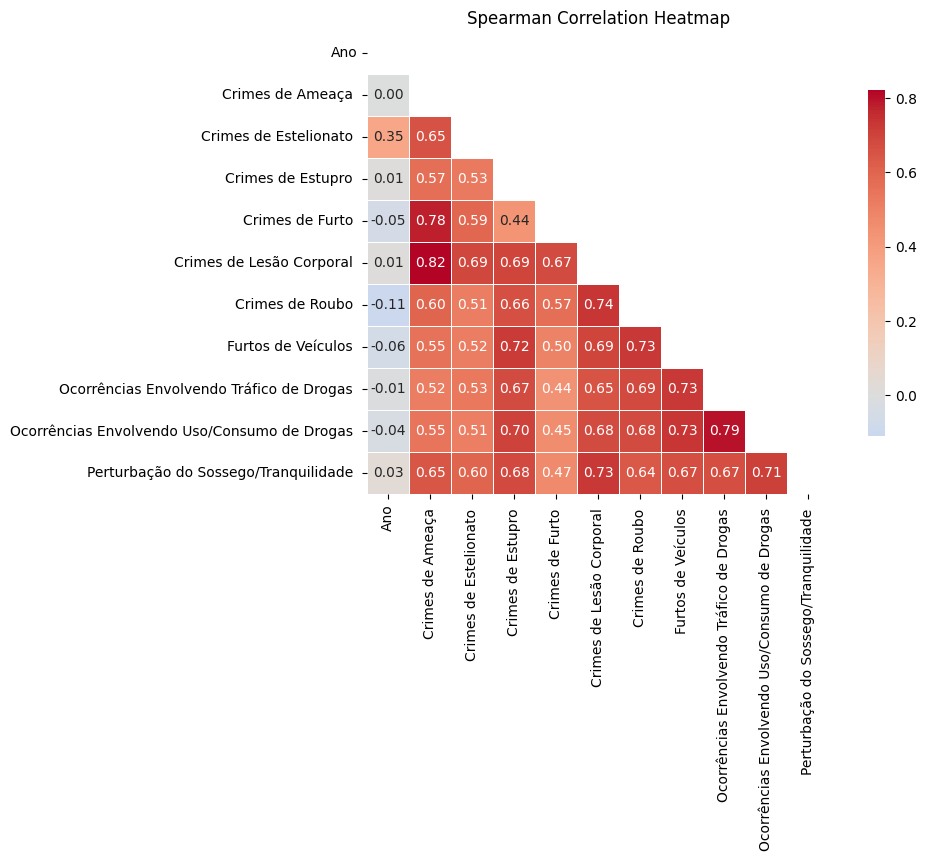

In [40]:
spearman_corr[mask][spearman_corr[mask]!=1].max().max()

0.8217889696958407

### Data Visualizations

- Let us make some insightful visualizations of this data.

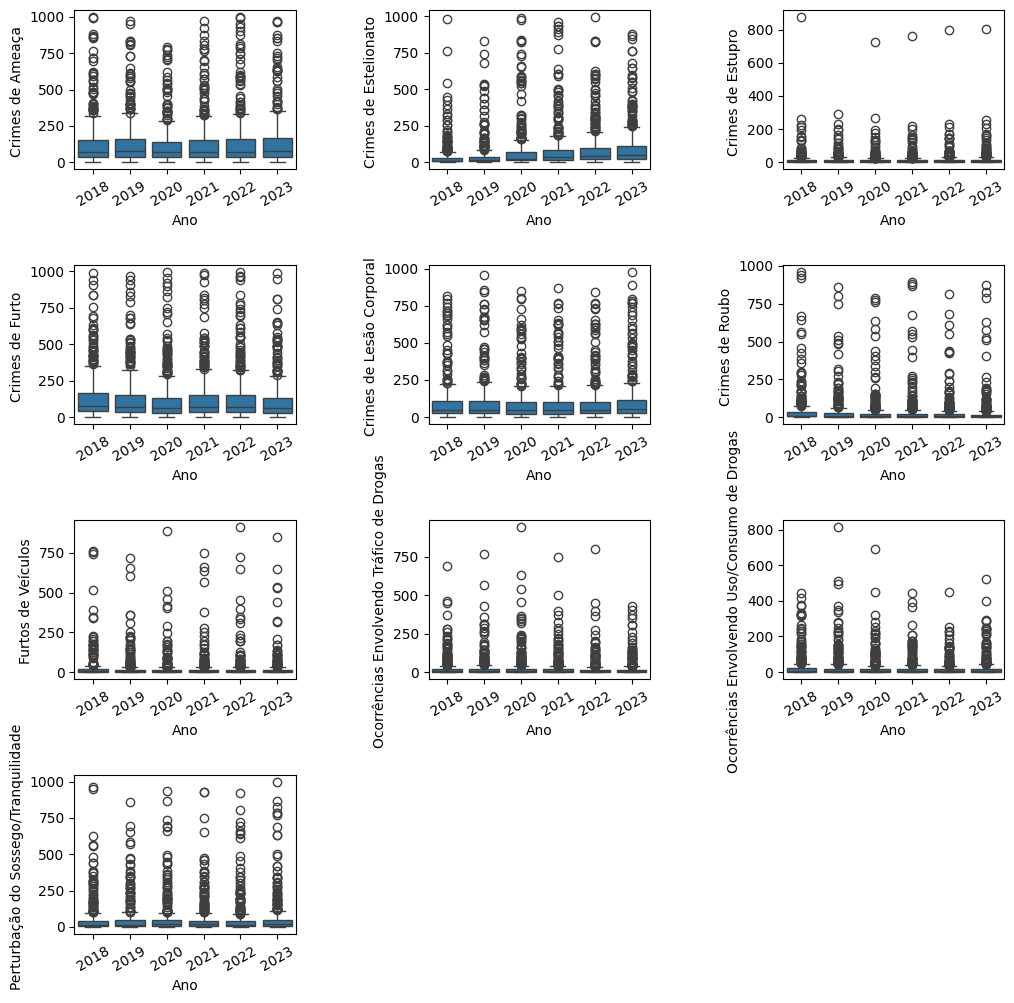

In [62]:
nrows = 4
ncols = 3
cols_numeric = list(df.drop(columns=['Ano','Localidade']).columns)

fig, axes = plt.subplots(nrows, ncols, figsize=(12,12))
plt.subplots_adjust(wspace=0.6,hspace=0.6)


idx = 0
for row in range(nrows):
    for col in range(ncols):

        try:
            ax = axes[row, col]

            sns.boxplot(data=df,y=df[cols_numeric[idx]],x='Ano',ax=ax)

            ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
            idx += 1
        except:
            ax.set_visible(False)

plt.show()


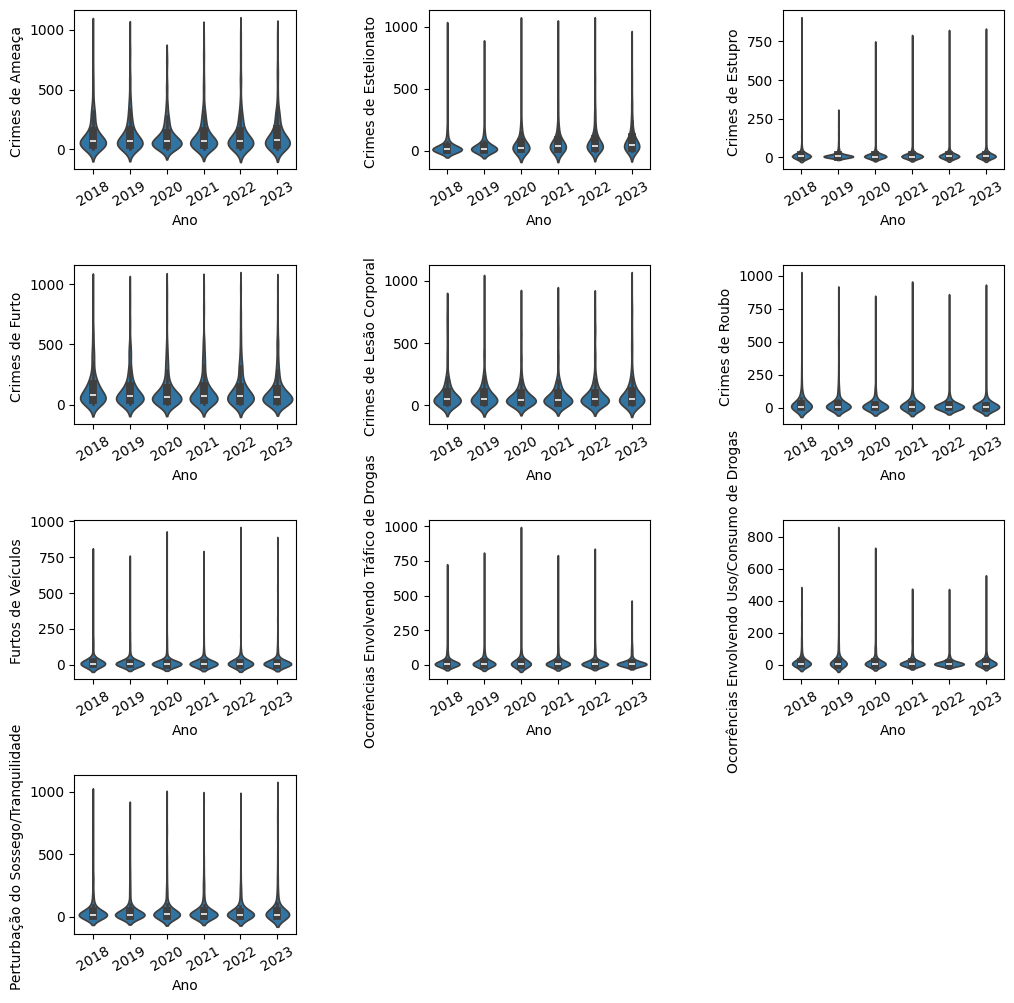

In [63]:
nrows = 4
ncols = 3
cols_numeric = list(df.drop(columns=['Ano','Localidade']).columns)

fig, axes = plt.subplots(nrows, ncols, figsize=(12,12))
plt.subplots_adjust(wspace=0.6,hspace=0.6)


idx = 0
for row in range(nrows):
    for col in range(ncols):

#    for col in :
        try:
            ax = axes[row, col]

            sns.violinplot(data=df,y=df[cols_numeric[idx]],x='Ano',ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=30)         
            idx += 1
        except:
            ax.set_visible(False)
plt.show()


In [64]:
# List containing all Metropolitan Cities of Curiitba
lista_metropolitana_curitiba = [
    "Curitiba",
    "Adrianópolis",
    "Almirante Tamandaré",
    "Araucária",
    "Bocaiúva do Sul",
    "Campina Grande do Sul",
    "Campo do Tenente",
    "Campo Largo",
    "Campo Magro",
    "Cerro Azul",
    "Colombo",
    "Contenda",
    "Doutor Ulysses",
    "Fazenda Rio Grande",
    "Itaperuçu",
    "Lapa",
    "Mandirituba",
    "Pinhais",
    "Piraquara",
    "Quatro Barras",
    "Quitandinha",
    "Rio Branco do Sul",
    "Rio Negro",
    "São José dos Pinhais",
    "Tunas do Paraná"
]


In [65]:
# Verifying if all cities in the list are present in the dataset
for cidade in lista_metropolitana_curitiba:
    print([cidade if cidade in list(df['Localidade'].unique()) else None])

['Curitiba']
['Adrianópolis']
['Almirante Tamandaré']
['Araucária']
['Bocaiúva do Sul']
['Campina Grande do Sul']
['Campo do Tenente']
['Campo Largo']
['Campo Magro']
['Cerro Azul']
['Colombo']
['Contenda']
['Doutor Ulysses']
['Fazenda Rio Grande']
['Itaperuçu']
['Lapa']
['Mandirituba']
['Pinhais']
['Piraquara']
['Quatro Barras']
['Quitandinha']
['Rio Branco do Sul']
['Rio Negro']
['São José dos Pinhais']
['Tunas do Paraná']


In [66]:
# creating a DataFrame with only the cities in the metropolitan area of Curiitba
df_metropolitana = df[df['Localidade'].isin(lista_metropolitana_curitiba)].reset_index(drop=True)

In [67]:
# Inspecting the first 10 rows
df_metropolitana.head(10)

,Ano,Localidade,Crimes de Ameaça,Crimes de Estelionato,Crimes de Estupro,Crimes de Furto,Crimes de Lesão Corporal,Crimes de Roubo,Furtos de Veículos,Ocorrências Envolvendo Tráfico de Drogas,Ocorrências Envolvendo Uso/Consumo de Drogas,Perturbação do Sossego/Tranquilidade
0,2018,Adrianópolis,43.000,13.0,9.0,31.000,32.0,2.0,2.0,1.0,3.0,3.0
1,2019,Adrianópolis,46.000,7.0,6.0,24.000,19.0,3.0,2.0,1.5,5.0,1.0
2,2020,Adrianópolis,56.000,24.0,4.0,22.000,22.0,2.0,2.0,1.5,6.0,3.0
3,2021,Adrianópolis,60.000,53.0,4.0,31.000,22.0,2.0,2.0,1.5,5.0,4.0
4,2022,Adrianópolis,46.000,32.0,7.0,29.000,37.0,2.0,2.0,2.0,5.0,4.0
5,2023,Adrianópolis,41.000,30.0,3.0,14.000,22.0,2.0,2.0,1.5,5.0,2.0
6,2018,Almirante Tamandaré,1.151,174.0,68.0,1.129,660.0,639.0,176.0,44.0,81.0,157.0
7,2019,Almirante Tamandaré,1.387,169.0,85.0,969.000,762.0,510.0,125.0,27.0,46.0,175.0
8,2020,Almirante Tamandaré,1.092,420.0,53.0,1.004,618.0,376.0,129.0,46.0,29.0,154.0
9,2021,Almirante Tamandaré,924.000,913.0,54.0,1.198,564.0,272.0,117.0,43.0,33.0,82.0


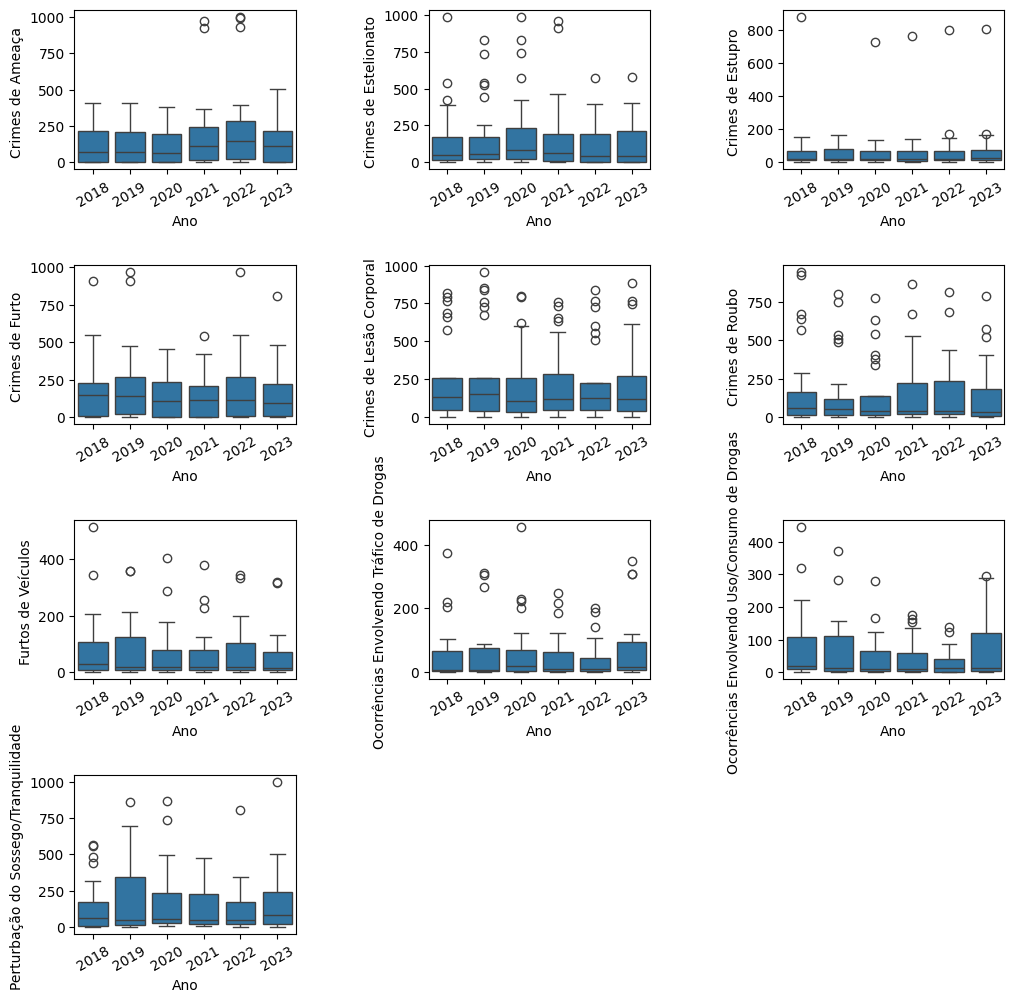

In [68]:
nrows = 4
ncols = 3
cols_numeric = list(df.drop(columns=['Ano','Localidade']).columns)

fig, axes = plt.subplots(nrows, ncols, figsize=(12,12))
plt.subplots_adjust(wspace=0.6,hspace=0.6)

idx = 0
for row in range(nrows):
    for col in range(ncols):

        try:
            ax = axes[row, col]

            sns.boxplot(data=df_metropolitana,y=df_metropolitana[cols_numeric[idx]],x='Ano',ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=30)         
            idx += 1
        except:
            ax.set_visible(False)
plt.show()



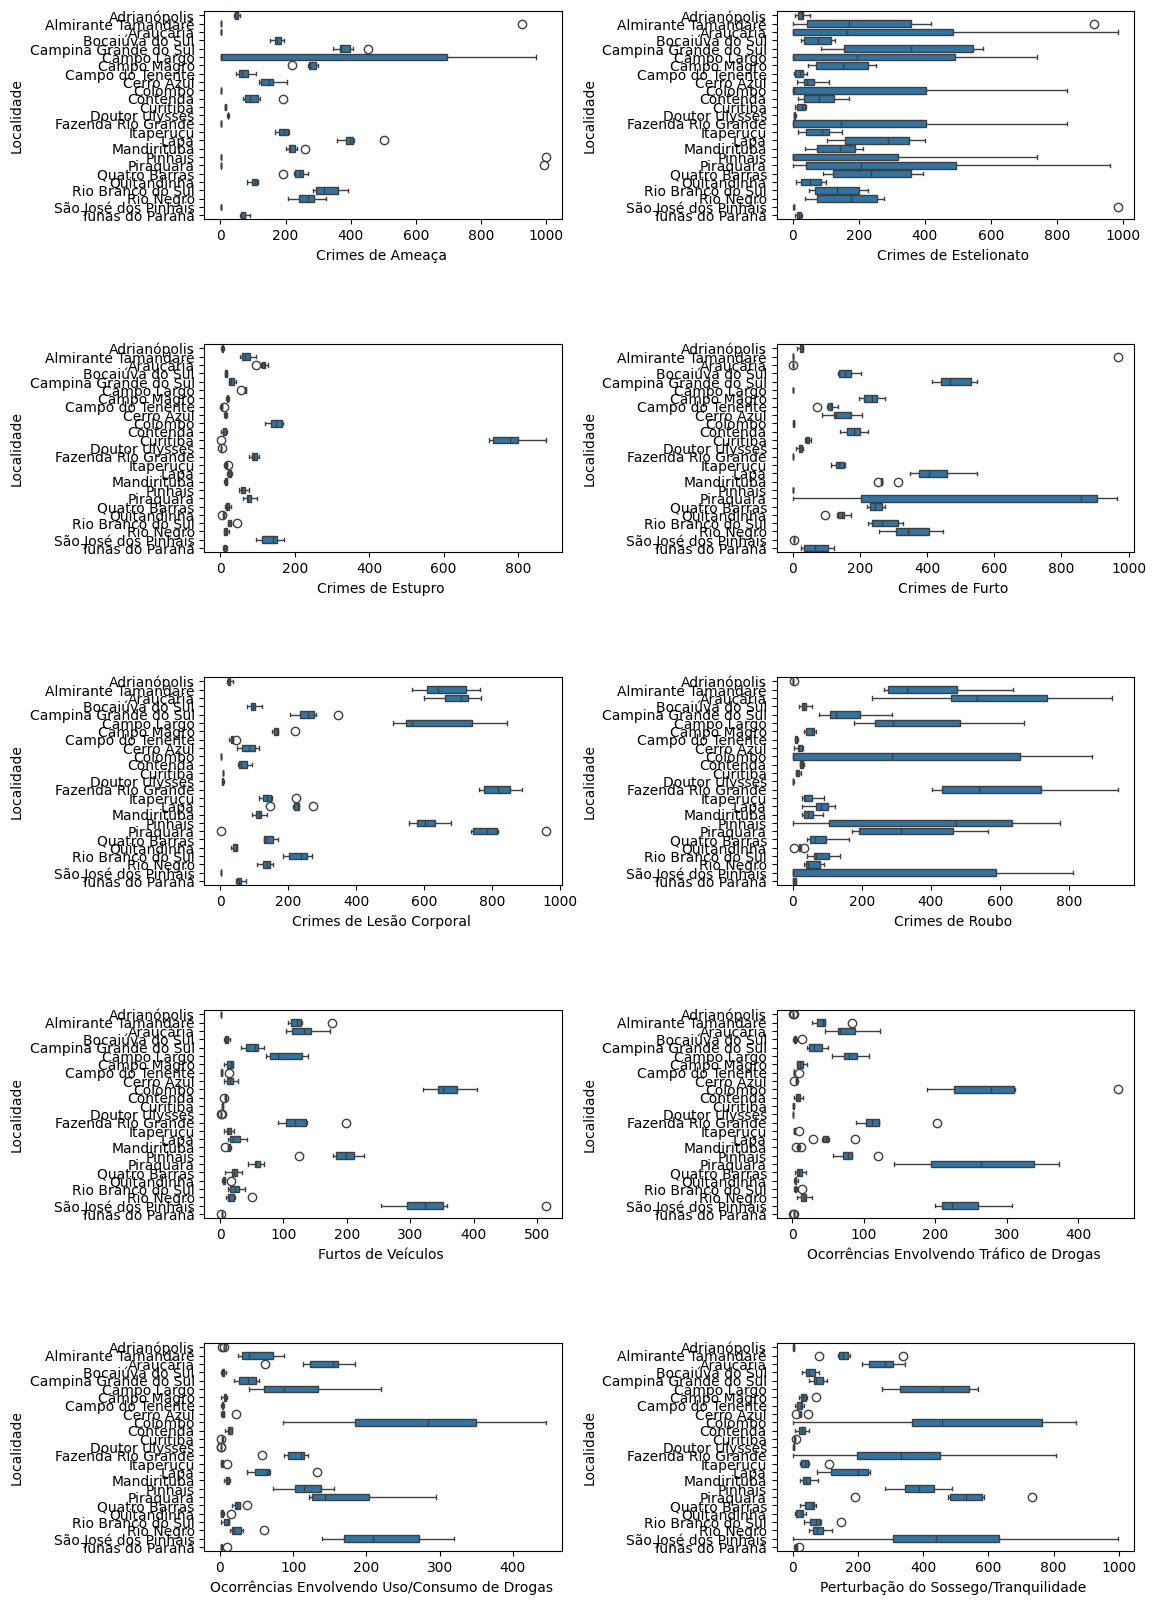

In [69]:
nrows = 5
ncols = 2
cols_numeric = list(df.drop(columns=['Ano','Localidade']).columns)

fig, axes = plt.subplots(nrows, ncols, figsize=(12,20))
plt.subplots_adjust(wspace=0.6,hspace=0.6)

idx = 0
for row in range(nrows):
    for col in range(ncols):

        try:
            ax = axes[row, col]

            sns.boxplot(data=df_metropolitana,x=df_metropolitana[cols_numeric[idx]],
                        y='Localidade',ax=ax)
#            ax.set_xticklabels(ax.get_xticklabels(),rotation=30)         
            idx += 1
        except:
            ax.set_visible(False)
plt.show()



In [70]:
# list containing the most relevant cities around Curitiba
list_principais_cidades = [
    "Curitiba",
    "São José dos Pinhais",
    "Araucária",
    "Colombo",
    "Pinhais",
    "Campo Largo",
    "Almirante Tamandaré",
    "Piraquara",
    "Fazenda Rio Grande",
    "Campo Magro"
]

In [71]:
# creating a dataframe from the most important cities around Curitiba
df_principais_cidades = df[df['Localidade'].isin(list_principais_cidades)].reset_index(drop=True)

In [72]:
# Visualizing the first 10 rows
df_principais_cidades.head(10)

,Ano,Localidade,Crimes de Ameaça,Crimes de Estelionato,Crimes de Estupro,Crimes de Furto,Crimes de Lesão Corporal,Crimes de Roubo,Furtos de Veículos,Ocorrências Envolvendo Tráfico de Drogas,Ocorrências Envolvendo Uso/Consumo de Drogas,Perturbação do Sossego/Tranquilidade
0,2018,Almirante Tamandaré,1.151,174.000,68.0,1.129,660.0,639.0,176.0,44.0,81.0,157.0
1,2019,Almirante Tamandaré,1.387,169.000,85.0,969.000,762.0,510.0,125.0,27.0,46.0,175.0
2,2020,Almirante Tamandaré,1.092,420.000,53.0,1.004,618.0,376.0,129.0,46.0,29.0,154.0
3,2021,Almirante Tamandaré,924.000,913.000,54.0,1.198,564.0,272.0,117.0,43.0,33.0,82.0
4,2022,Almirante Tamandaré,1.146,1.119,67.0,1.196,604.0,286.0,108.0,31.0,25.0,140.0
5,2023,Almirante Tamandaré,1.343,1.236,96.0,1.017,744.0,264.0,110.0,83.0,88.0,338.0
6,2018,Araucária,1.165,329.000,129.0,1.637,689.0,923.0,144.0,65.0,184.0,316.0
7,2019,Araucária,1.318,536.000,116.0,1.647,728.0,801.0,173.0,69.0,158.0,345.0
8,2020,Araucária,1.068,985.000,122.0,1.636,600.0,537.0,139.0,123.0,113.0,214.0
9,2021,Araucária,1.033,1.707,95.0,1.772,653.0,528.0,126.0,64.0,162.0,219.0


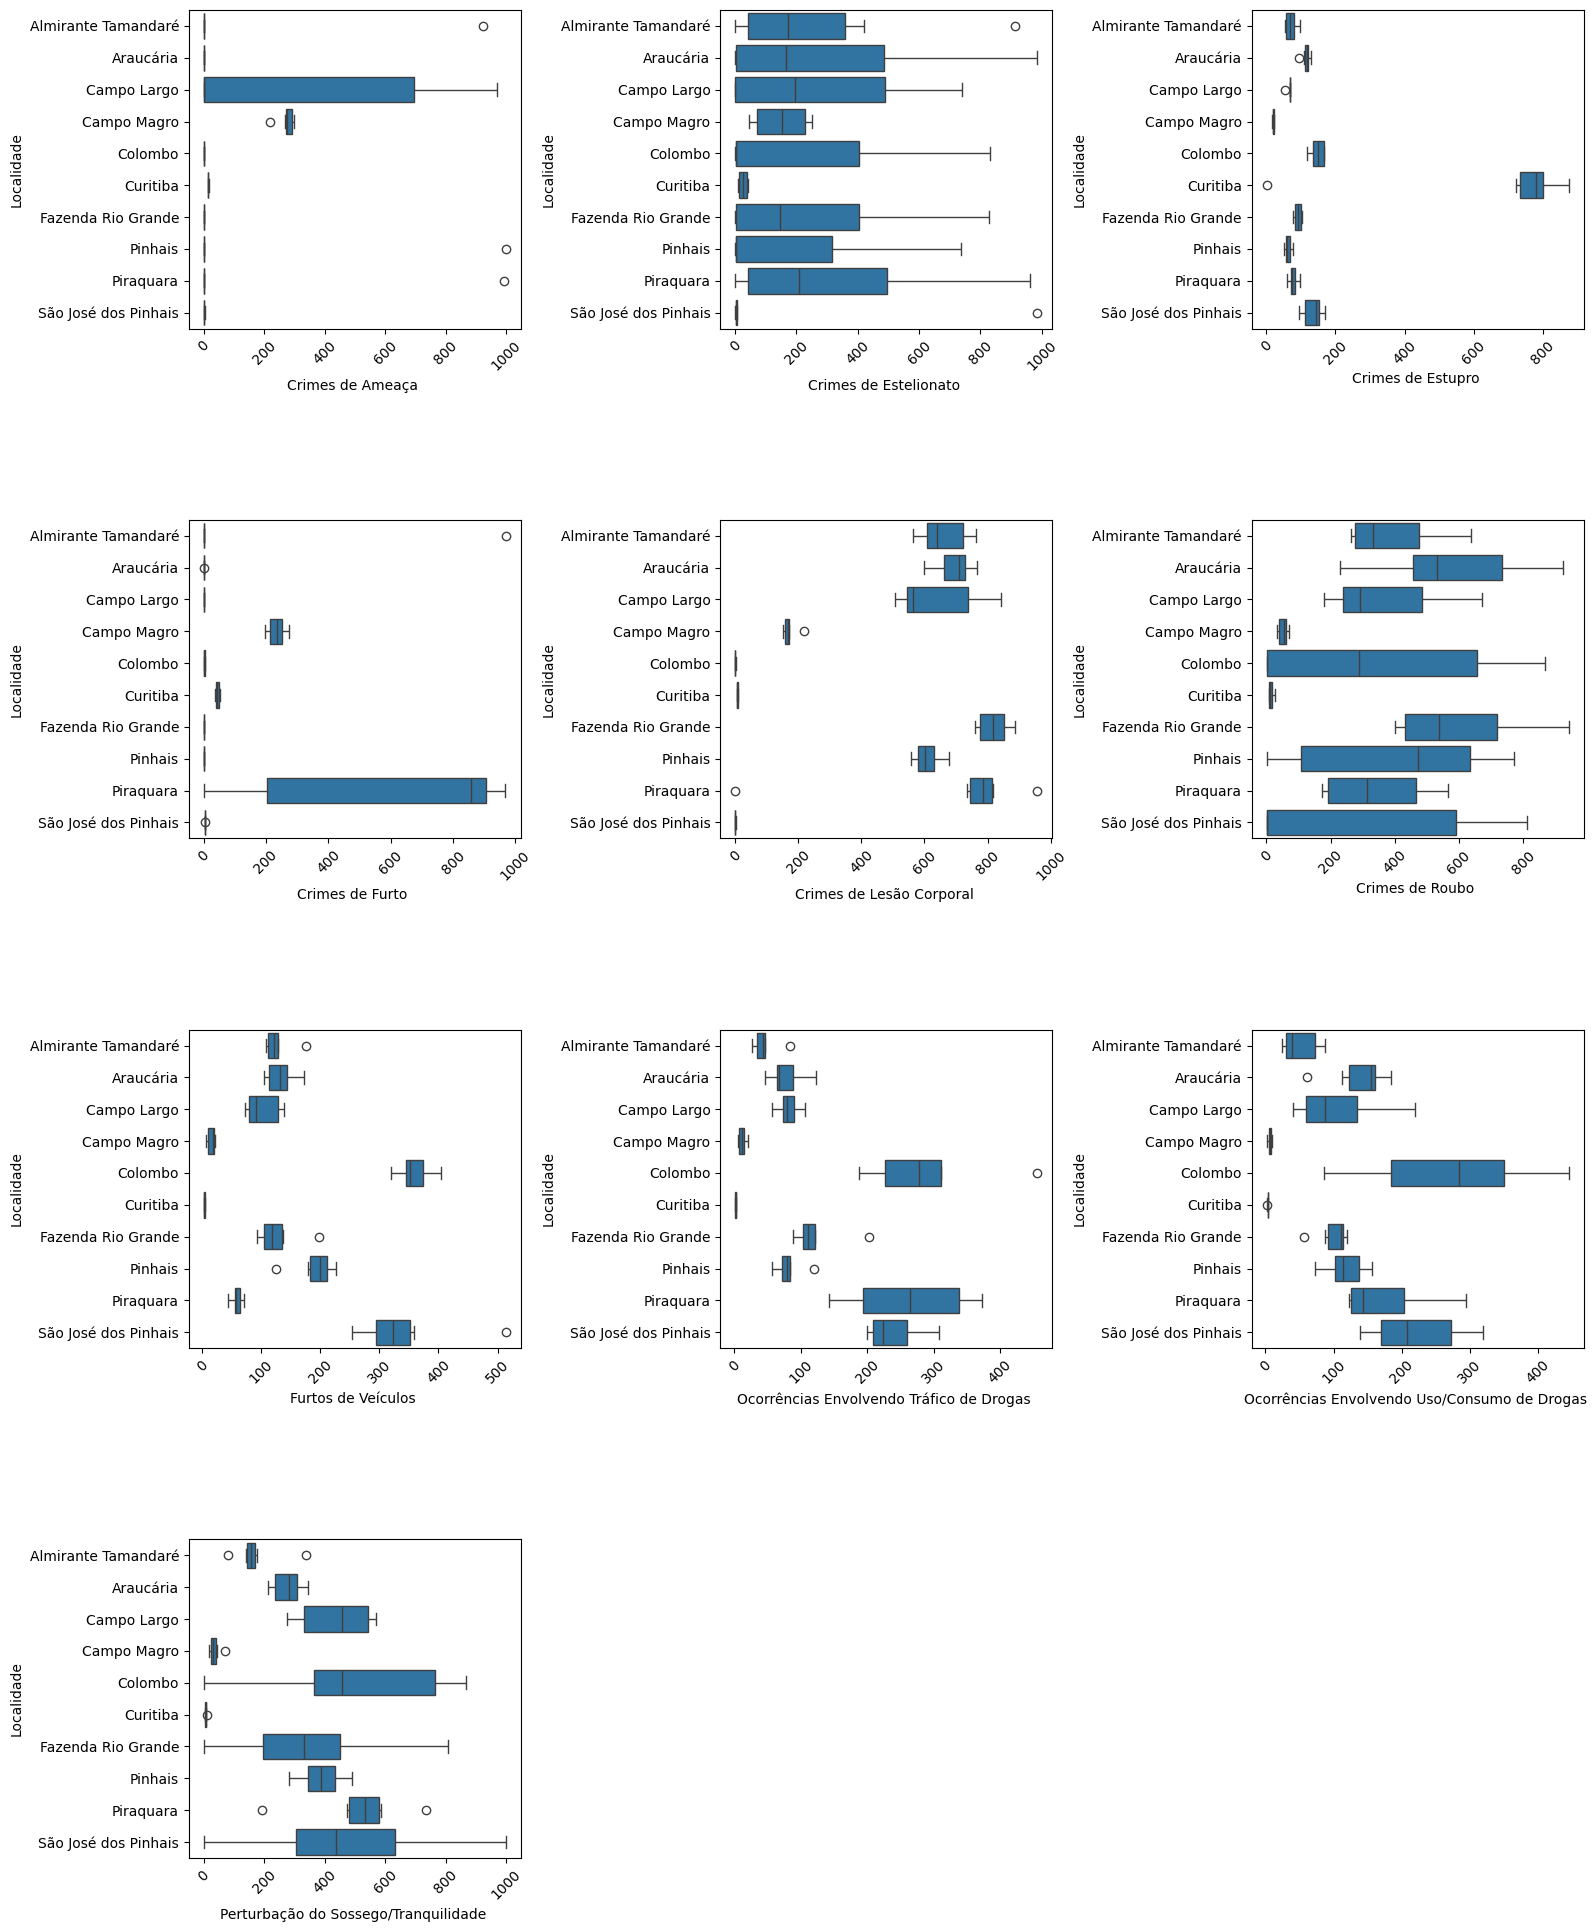

In [73]:
nrows = 4
ncols = 3
cols_numeric = list(df_principais_cidades.drop(columns=['Ano','Localidade']).columns)

fig, axes = plt.subplots(nrows, ncols, figsize=(18,24))
plt.subplots_adjust(wspace=0.6,hspace=0.6)


idx = 0
for row in range(nrows):
    for col in range(ncols):

        try:
            ax = axes[row, col]

            sns.boxplot(data=df_principais_cidades,x=df_principais_cidades[cols_numeric[idx]],
                        y='Localidade',ax=ax,orient='h')
            ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
            idx += 1
        except:
            ax.set_visible(False)
plt.show()

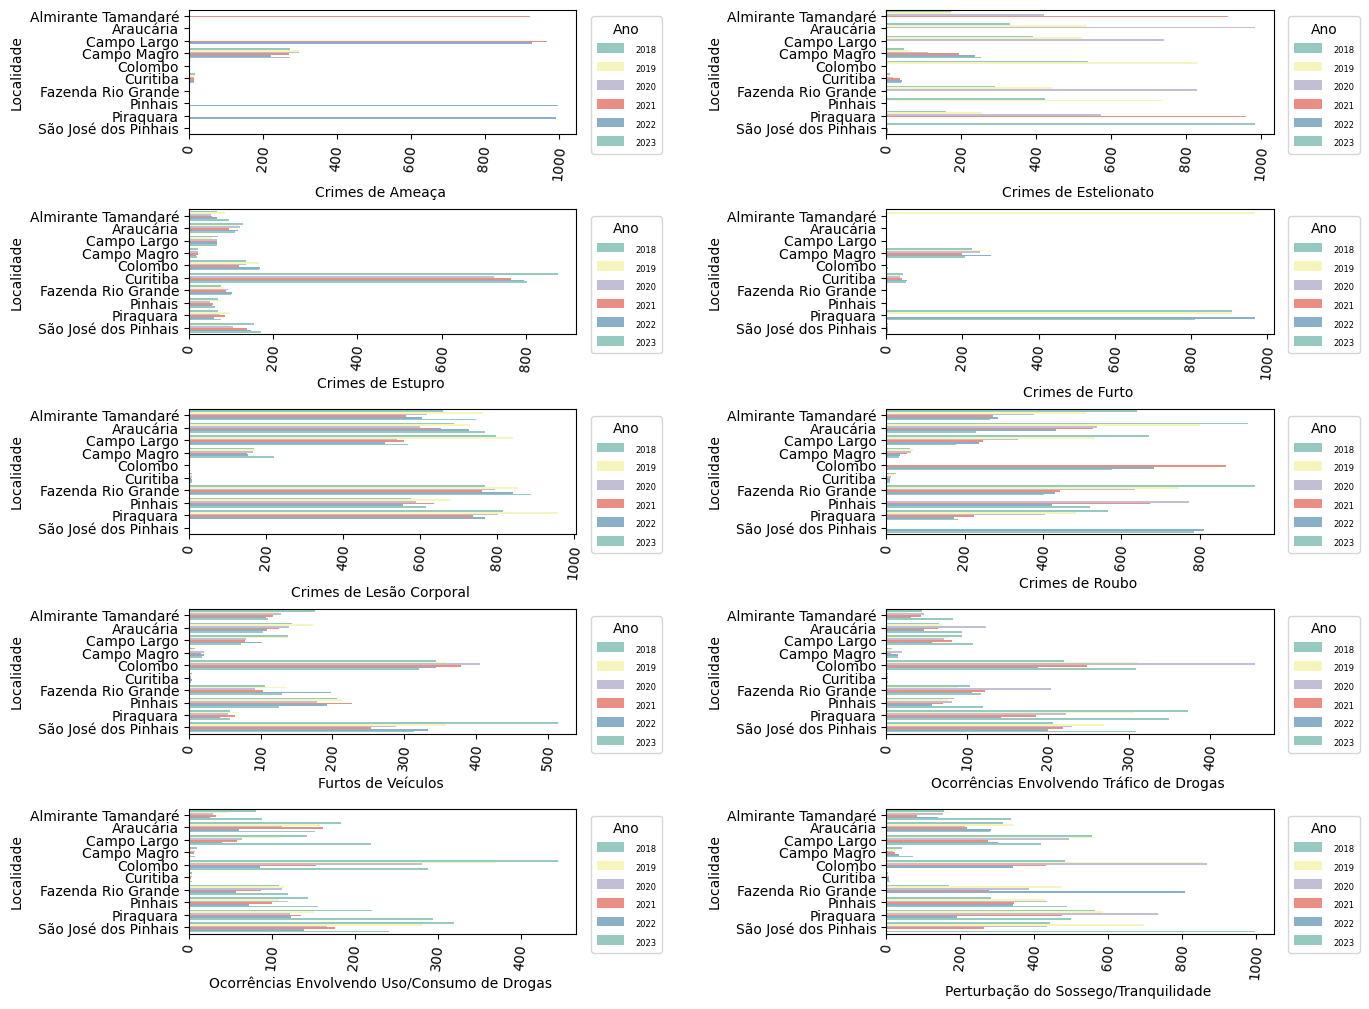

In [74]:
nrows = 5
ncols = 2
cols_numeric = list(df_principais_cidades.drop(columns=['Ano','Localidade']).columns)

fig, axes = plt.subplots(nrows, ncols, figsize=(14,12))
plt.subplots_adjust(wspace=0.8,hspace=0.6)


idx = 0
for row in range(nrows):
    for col in range(ncols):

#    for col in :
        try:
            ax = axes[row, col]

            sns.barplot(data=df_principais_cidades,x=df_principais_cidades[cols_numeric[idx]],
                        y='Localidade',ax=ax,orient='y',hue='Ano',
                        palette=sns.color_palette("Set3", 5))
            ax.set_xticklabels(ax.get_xticklabels(),rotation=85)
            idx += 1
            # Place legend outside the axes (adjust bbox_to_anchor as needed)
            legend = ax.legend(title='Ano', loc='upper left', bbox_to_anchor=(1.02, 1))
            for label in legend.get_texts():
                label.set_size(6)  # Set legend text size


        except:
            ax.set_visible(False)
plt.show()

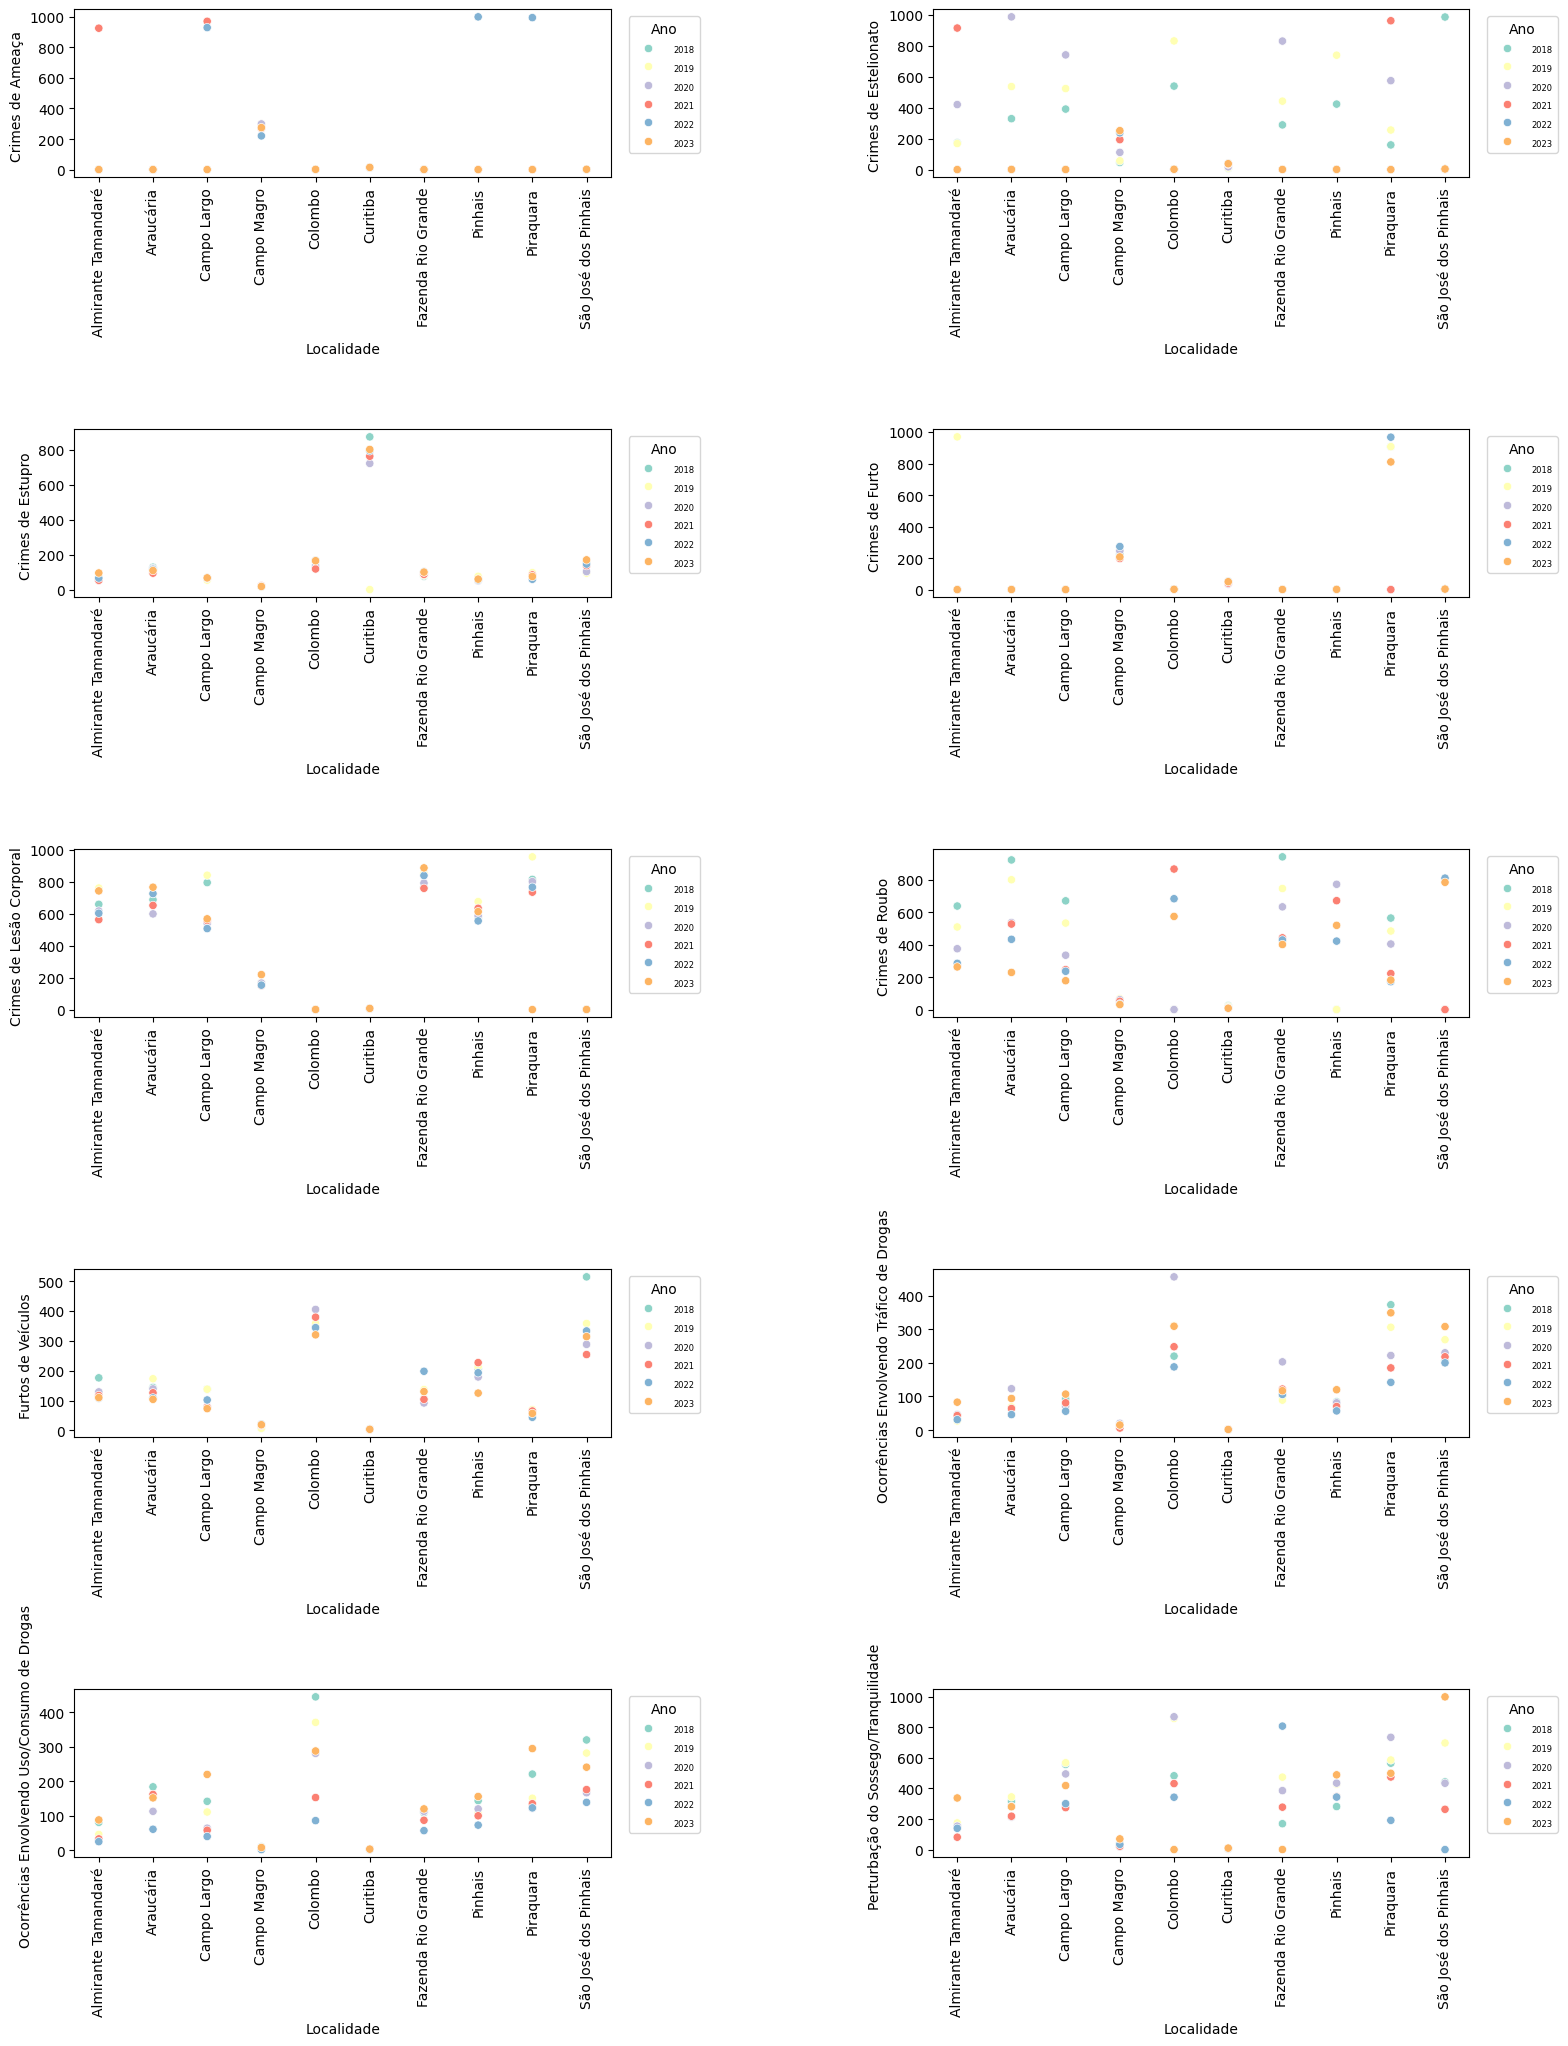

In [97]:
nrows = 5
ncols = 2
cols_numeric = list(df_principais_cidades.drop(columns=['Ano','Localidade']).columns)

fig, axes = plt.subplots(nrows, ncols, figsize=(18,24))
plt.subplots_adjust(wspace=0.6,hspace=1.5)


idx = 0
for row in range(nrows):
    for col in range(ncols):

        try:
            ax = axes[row, col]

            sns.scatterplot(data=df_principais_cidades,y=df_principais_cidades[cols_numeric[idx]],
                        x='Localidade',hue='Ano',ax=ax,markers='*',palette=sns.color_palette("Set3", 6))
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
            idx += 1
            # Place legend outside the axes (adjust bbox_to_anchor as needed)
            legend = ax.legend(title='Ano', loc='upper left', bbox_to_anchor=(1.02, 1))
            for label in legend.get_texts():
                label.set_size(6)  # Set legend text size

        except:
            ax.set_visible(False)
plt.show()

### Inspecting some descriptive Statistics according to the main Cities around Curitiba

In [109]:
df_min = df_principais_cidades.drop(columns=['Ano']).groupby(by=['Localidade']).min().round(1)
list_cols_min = [col+"_min" for col in df_min.columns]
df_min = pd.DataFrame(data=df_min.values,index=df_min.index,columns=list_cols_min).T
df_max = df_principais_cidades.drop(columns=['Ano']).groupby(by=['Localidade']).max().round(1)
list_cols_max = [col+"_max" for col in df_max.columns]
df_max = pd.DataFrame(data=df_max.values,index=df_max.index,columns=list_cols_max).T
df_mean = df_principais_cidades.drop(columns=['Ano']).groupby(by=['Localidade']).mean().round(1)
list_cols_mean = [col+"_mean" for col in df_mean.columns]
df_mean = pd.DataFrame(data=df_mean.values,index=df_mean.index,columns=list_cols_mean).T
df_median = df_principais_cidades.drop(columns=['Ano']).groupby(by=['Localidade']).median().round(1)
list_cols_median = [col+"_median" for col in df_median.columns]
df_median = pd.DataFrame(data=df_median.values,index=df_median.index,columns=list_cols_median).T

In [110]:
df_statistics = pd.concat([df_min,df_max,df_mean,df_median])

In [111]:
df_statistics.head(10)

Localidade,Almirante Tamandaré,Araucária,Campo Largo,Campo Magro,Colombo,Curitiba,Fazenda Rio Grande,Pinhais,Piraquara,São José dos Pinhais
Crimes de Ameaça _min,1.1,1.0,1.1,221.0,2.0,13.5,1.3,1.2,1.0,2.3
Crimes de Estelionato _min,1.1,1.7,1.2,47.0,1.3,8.7,1.6,1.2,1.1,1.5
Crimes de Estupro _min,53.0,95.0,55.0,16.0,119.0,1.0,77.0,51.0,60.0,95.0
Crimes de Furto _min,1.0,1.4,1.1,198.0,2.3,36.2,1.4,2.0,1.0,3.2
Crimes de Lesão Corporal _min,564.0,600.0,508.0,151.0,1.2,7.0,760.0,556.0,1.0,1.2
Crimes de Roubo _min,264.0,230.0,179.0,32.0,1.1,9.3,402.0,1.2,173.0,1.0
Furtos de Veículos _min,108.0,104.0,73.0,7.0,320.0,2.9,92.0,125.0,44.0,254.0
Ocorrências Envolvendo Tráfico de Drogas _min,27.0,46.0,56.0,6.0,188.0,1.4,89.0,57.0,142.0,200.0
Ocorrências Envolvendo Uso/Consumo de Drogas _min,25.0,61.0,40.0,2.0,86.0,2.1,57.0,73.0,122.0,139.0
Perturbação do Sossego/Tranquilidade _min,82.0,214.0,275.0,19.0,1.2,5.2,1.5,282.0,192.0,1.1


In [112]:
df_statistics.tail(30)

Localidade,Almirante Tamandaré,Araucária,Campo Largo,Campo Magro,Colombo,Curitiba,Fazenda Rio Grande,Pinhais,Piraquara,São José dos Pinhais
Crimes de Ameaça _max,924.0,1.4,969.0,299.0,3.1,17.3,1.5,998.0,993.0,3.2
Crimes de Estelionato _max,913.0,985.0,740.0,252.0,830.0,40.9,829.0,738.0,960.0,984.0
Crimes de Estupro _max,96.0,129.0,69.0,23.0,168.0,875.0,103.0,77.0,98.0,171.0
Crimes de Furto _max,969.0,1.9,1.6,274.0,3.2,53.2,1.9,2.5,967.0,4.7
Crimes de Lesão Corporal _max,762.0,767.0,842.0,220.0,1.8,8.5,888.0,677.0,957.0,1.7
Crimes de Roubo _max,639.0,923.0,671.0,69.0,867.0,25.4,942.0,773.0,565.0,811.0
Furtos de Veículos _max,176.0,173.0,138.0,21.0,405.0,4.9,198.0,227.0,70.0,514.0
Ocorrências Envolvendo Tráfico de Drogas _max,83.0,123.0,107.0,20.0,456.0,2.1,203.0,120.0,373.0,308.0
Ocorrências Envolvendo Uso/Consumo de Drogas _max,88.0,184.0,220.0,10.0,445.0,3.5,120.0,156.0,295.0,320.0
Perturbação do Sossego/Tranquilidade _max,338.0,345.0,568.0,71.0,868.0,10.9,807.0,489.0,734.0,998.0


In [113]:
# Exporting the data to .xlsx
#df_statistics.to_excel('./CrimesPR_Metropolitan_Curitiba_statistics.xlsx',index=True)